In [1]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlinrBackend.figure_format ='retina'

In [2]:
df = pd.read_csv(r'E:\Excel_files\Machine Learning\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# check the duplicates

df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

False    1337
True        1
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# remove duplicates

df = df.drop_duplicates()

In [9]:
df
df.duplicated().value_counts()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


False    1337
dtype: int64

In [10]:
# Identify the outliers

Q1,Q2,Q3 = tuple(df.charges.quantile(q = [0.25, 0.5, 0.75 ]).values)

In [11]:
print(Q1, Q2, Q3)

4746.344 9386.1613 16657.71745


In [12]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

11911.37345 34524.777625 -13120.716174999998


In [13]:
(df[(df.charges > UL) | (df.charges < LL)]).count()

age         139
sex         139
bmi         139
children    139
smoker      139
region      139
charges     139
dtype: int64

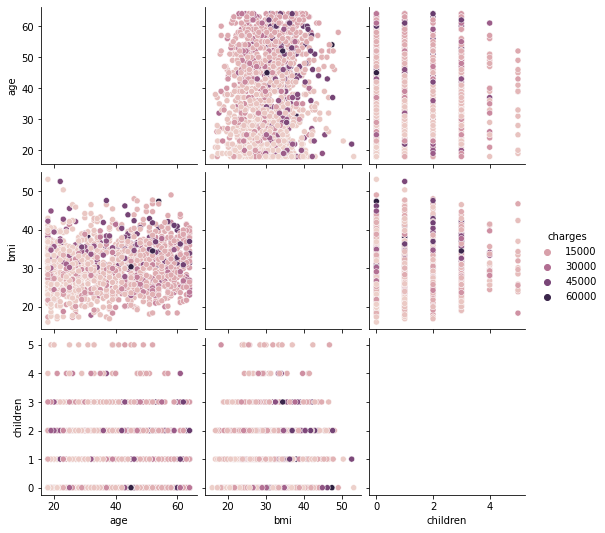

In [14]:
sns.pairplot(df, hue = 'charges')

<AxesSubplot: xlabel='smoker', ylabel='charges'>

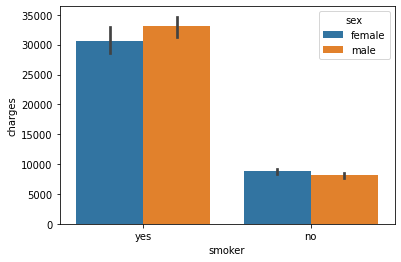

In [15]:
sns.barplot(data = df, x ="smoker", y = 'charges', hue = 'sex' )

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## a. Identify the Target Variable and Splitting the Data into Train and Test

In [17]:
# Identify the inputs(X) and output (y)

y = df['charges']
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [18]:
# Split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 100)

In [19]:
X_train.head()

,age,sex,bmi,children,smoker,region
1000,30,male,22.990,2,yes,northwest
885,32,male,28.930,1,yes,southeast
517,45,male,30.495,2,no,northwest
1132,57,male,40.280,0,no,northeast
1188,43,female,25.270,1,yes,northeast


In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


## b. Seperate the Categorial  and Numerical Columns:

In [21]:
X_train.head()

,age,sex,bmi,children,smoker,region
1000,30,male,22.990,2,yes,northwest
885,32,male,28.930,1,yes,southeast
517,45,male,30.495,2,no,northwest
1132,57,male,40.280,0,no,northeast
1188,43,female,25.270,1,yes,northeast


In [22]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [23]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
1000,male,yes,northwest
885,male,yes,southeast
517,male,no,northwest
1132,male,no,northeast
1188,female,yes,northeast


In [24]:
X_train_num = X_train.select_dtypes(include=['float64','int64'])

X_train_num.head()

,age,bmi,children
1000,30,22.990,2
885,32,28.930,1
517,45,30.495,2
1132,57,40.280,0
1188,43,25.270,1


## c. Scaling the Numerical Features

In [25]:
X_train_num.head()

,age,bmi,children
1000,30,22.990,2
885,32,28.930,1
517,45,30.495,2
1132,57,40.280,0
1188,43,25.270,1


In [26]:
# scaling the numeroical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
1000,-0.644567,-1.234380,0.785181
885,-0.502636,-0.267219,-0.065361
517,0.419914,-0.012403,0.785181
1132,1.271498,1.580808,-0.915903
1188,0.277983,-0.863146,-0.065361


In [27]:
X_train_num.describe()

,age,bmi,children
count,1002.000000,1002.000000,1002.000000
mean,39.082834,30.571173,1.076846
std,14.098417,6.144754,1.176307
min,18.000000,15.960000,0.000000
25%,26.000000,26.083750,0.000000
50%,39.000000,30.300000,1.000000
75%,51.000000,34.800000,2.000000
max,64.000000,53.130000,5.000000


In [28]:
print('Number of Numerical Feature:', scaler.n_features_in_)
print('Mean of each column:', scaler.mean_)
print('std of each column:', np.sqrt(scaler.var_))

Number of Numerical Feature: 3
Mean of each column: [39.08283433 30.57117265  1.07684631]
std of each column: [14.09138002  6.14168693  1.17572029]


## d. Applying OneHotEncoding on Categorical Columns

In [29]:
X_train_cat['sex'].value_counts(normalize= True)

male      0.505988
female    0.494012
Name: sex, dtype: float64

In [30]:
X_train_cat['smoker'].value_counts(normalize = True)

no     0.790419
yes    0.209581
Name: smoker, dtype: float64

In [31]:
X_train_cat['region'].value_counts(normalize = True)

southeast    0.270459
southwest    0.250499
northeast    0.240519
northwest    0.238523
Name: region, dtype: float64

In [32]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop= 'first', min_frequency= 1000, sparse_output= False)

# column names are (annoyingly) Lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)\

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                              columns = encoder_.get_feature_names_out(X_train_cat.columns),
                              index = X_train_cat.index)

X_train_cat_ohe.head()

""
1000
885
517
1132
1188


In [33]:
encoder_.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [34]:
encoder_.infrequent_categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [35]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1000,1.0,1.0,1.0,0.0,0.0
885,1.0,1.0,0.0,1.0,0.0
517,1.0,0.0,1.0,0.0,0.0
1132,1.0,0.0,0.0,0.0,0.0
1188,0.0,1.0,0.0,0.0,0.0


## e. Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [43]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,age,bmi,children,sex,smoker,region
1000,-0.644567,-1.234380,0.785181,1,1,1
885,-0.502636,-0.267219,-0.065361,1,1,2
517,0.419914,-0.012403,0.785181,1,2,1
1132,1.271498,1.580808,-0.915903,1,2,3
1188,0.277983,-0.863146,-0.065361,2,1,3


## f. Preparing Test Data

In [44]:
X_test.head()

,age,sex,bmi,children,smoker,region
12,23,male,34.400,0,no,southwest
306,28,female,27.500,2,no,southwest
318,44,female,27.645,0,no,northwest
816,24,female,24.225,0,no,northwest
157,18,male,25.175,0,yes,northeast


In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 12 to 625
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ KB


In [46]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
12,male,no,southwest
306,female,no,southwest
318,female,no,northwest
816,female,no,northwest
157,male,yes,northeast


In [47]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
12,23,34.400,0
306,28,27.500,2
318,44,27.645,0
816,24,24.225,0
157,18,25.175,0


In [48]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
12,-1.141324,0.623416,-0.915903
306,-0.786497,-0.500054,0.785181
318,0.348948,-0.476444,-0.915903
816,-1.070359,-1.033295,-0.915903
157,-1.496151,-0.878614,-0.915903


In [49]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
12
306
318
816
157


In [50]:
X_test_cat_le['sex'] = X_test_cat['sex'].apply(lambda x : sex_encoder[x])

X_test_cat_le['smoker'] = X_test_cat['smoker'].apply(lambda x : smoker_encoder[x])

X_test_cat_le['region'] = X_test_cat['region'].apply(lambda x : region_encoder[x])

X_test_cat_le.head()

,sex,smoker,region
12,1,2,4
306,2,2,4
318,2,2,1
816,2,2,1
157,1,1,3


In [51]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,age,bmi,children,sex,smoker,region
12,-1.141324,0.623416,-0.915903,1,2,4
306,-0.786497,-0.500054,0.785181,2,2,4
318,0.348948,-0.476444,-0.915903,2,2,1
816,-1.070359,-1.033295,-0.915903,2,2,1
157,-1.496151,-0.878614,-0.915903,1,1,3


## Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [53]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [54]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,4606.187062
306,20177.67113,4811.170188
318,7421.19455,8503.580586
816,2842.76075,2016.983997
157,15518.18025,24059.076126


<AxesSubplot: xlabel='charges', ylabel='Count'>

<AxesSubplot: xlabel='charges', ylabel='Count'>

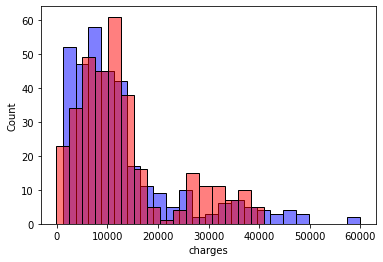

In [55]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [56]:
# Evaluation

from sklearn import metrics

MeanAbsoluteError_LR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_LR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_LR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_LR)

print('Mean Squared Error: ', MeanSquaredError_LR)

print('Root Mean Squared Error: ', RootMeanSquaredError_LR)

Mean Absolute Error:  3944.260752230639
Mean Squared Error:  31554546.310417302
Root Mean Squared Error:  5617.343349877885


## KNN Regression

In [57]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [58]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [59]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,5679.163466
306,20177.67113,4492.306400
318,7421.19455,7604.879520
816,2842.76075,3306.154030
157,15518.18025,23431.680346


<AxesSubplot: xlabel='charges', ylabel='Count'>

<AxesSubplot: xlabel='charges', ylabel='Count'>

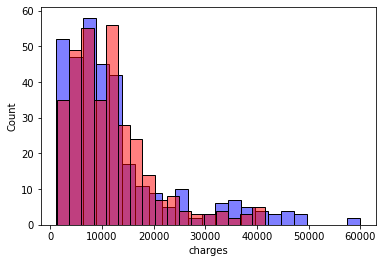

In [60]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [61]:
from sklearn import metrics

MeanAbsoluteError_KNN = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_KNN = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_KNN)

print('Mean Squared Error: ', MeanSquaredError_KNN)

print('Root Mean Squared Error: ', RootMeanSquaredError_KNN)

Mean Absolute Error:  3976.181540504477
Mean Squared Error:  43301951.71070831
Root Mean Squared Error:  6580.421848993294


## Decision Tree Regression

In [62]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)


DecisionTreeRegressor()

In [63]:
y_test_pred = regressor.predict(X_test_transformed)

In [64]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,1837.28190
306,20177.67113,4340.44090
318,7421.19455,28340.18885
816,2842.76075,22395.74424
157,15518.18025,16297.84600


<AxesSubplot: xlabel='charges', ylabel='Count'>

<AxesSubplot: xlabel='charges', ylabel='Count'>

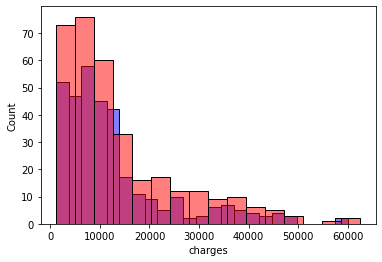

In [65]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [66]:
from sklearn import metrics

MeanAbsoluteError_DTR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_DTR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_DTR)

print('Mean Squared Error: ', MeanSquaredError_DTR)

print('Root Mean Squared Error: ', RootMeanSquaredError_DTR)

Mean Absolute Error:  3463.6469989970146
Mean Squared Error:  47855940.04413601
Root Mean Squared Error:  6917.798786039964


## Ensemble

## Random Forest Regression

In [67]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [68]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [69]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,4686.550596
306,20177.67113,4510.467093
318,7421.19455,15071.545128
816,2842.76075,8587.618337
157,15518.18025,16613.441080


<AxesSubplot: xlabel='charges', ylabel='Count'>

<AxesSubplot: xlabel='charges', ylabel='Count'>

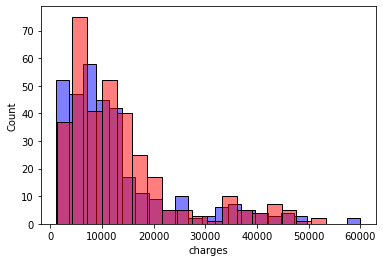

In [70]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [71]:
from sklearn import metrics

MeanAbsoluteError_RFR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_RFR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_RFR)

print('Mean Squared Error: ', MeanSquaredError_RFR)

print('Root Mean Squared Error: ', RootMeanSquaredError_RFR)

Mean Absolute Error:  2735.0992301099755
Mean Squared Error:  20887865.831530817
Root Mean Squared Error:  4570.324477707334


## Boosting

## Gradient Boosted Decision Tree

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [73]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [74]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,3925.910767
306,20177.67113,6838.546567
318,7421.19455,9817.472221
816,2842.76075,6904.832003
157,15518.18025,15636.182231


<AxesSubplot: xlabel='charges', ylabel='Count'>

<AxesSubplot: xlabel='charges', ylabel='Count'>

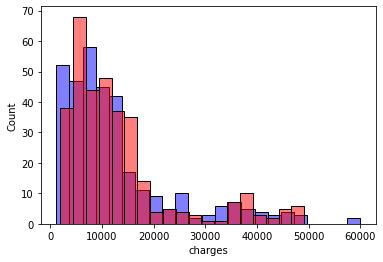

In [75]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [76]:
from sklearn import metrics

MeanAbsoluteError_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_GBDT)

print('Mean Squared Error: ', MeanSquaredError_GBDT)

print('Root Mean Squared Error: ', RootMeanSquaredError_GBDT)

Mean Absolute Error:  2305.8712688407204
Mean Squared Error:  15405073.247652613
Root Mean Squared Error:  3924.9297124474233


In [80]:
df_data = [['Linear Regression',MeanAbsoluteError_LR, MeanSquaredError_LR, RootMeanSquaredError_LR],
                   ['K-Nearest Neighbor Regression', MeanAbsoluteError_KNN, MeanSquaredError_KNN, RootMeanSquaredError_KNN ],
                   ['Decision Tree Regression', MeanAbsoluteError_DTR,MeanSquaredError_DTR, RootMeanSquaredError_DTR ],
                   ['Random Forest Regression ', MeanAbsoluteError_RFR,MeanSquaredError_RFR, RootMeanSquaredError_RFR ],
                   ['Gradient Boosting Decision Tree', MeanAbsoluteError_GBDT,MeanSquaredError_GBDT, RootMeanSquaredError_GBDT ]]

data = pd.DataFrame(df_data, columns = ['Algorithm','Mean Absolute Error','Mean Square Error','Root Mean Square Error'])

In [81]:
data

,Algorithm,Mean Absolute Error,Mean Square Error,Root Mean Square Error
0,Linear Regression,3944.260752,3.155455e+07,5617.343350
1,K-Nearest Neighbor Regression,3976.181541,4.330195e+07,6580.421849
2,Decision Tree Regression,3463.646999,4.785594e+07,6917.798786
3,Random Forest Regression,2735.099230,2.088787e+07,4570.324478
4,Gradient Boosting Decision Tree,2305.871269,1.540507e+07,3924.929712


## Observation

**1. By observing the above table we can say that Gradient Boosting Decision Tree Mean absolute error is less i.e. 2312.13 compaired to other algorithms.**

**2. By compairing all algorithms we can easily says that Gradient Boosting Decision tree is the best algorithm for the Medical Cost Prediction.**

## Conclusion

**Gradient Boosting Decision tree is the best algorithm for the Medical Cost Prediction.**